In [10]:
pip install radian

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for radian: filename=radian-0.6.15-py3-none-any.whl size=55137 sha256=77548ae5bd81858953125d26662f43581dc4e2181f2a3e3332f882a12cb50c71
  Stored in directory: c:\users\hiratshi\appdata\local\pip\cache\wheels\b5\75\ce\42bdb260ef1d3c84e2c0bbbc4376c5f444578a4d7a60a8be04
Successfully built radian

   ---------------------------------------- 0/4 [pycparser]
   ---------------------------------------- 0/4 [pycparser]
   ---------- ----------------------------- 1/4 [cffi]
   ---------- ----------------------------- 1/4 [cffi]
   ---------- ----------------------------- 1/4 [cffi]
   -------------------- ------------------- 2/4 [rchitect]
   -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 391.0 kB/s eta 0:00:21
   -- ------------------------------------- 0.5/8.7 MB 391.0 kB/s eta 0:00:21
   --- ------------------------------------ 0.8/8.7 MB 538.4 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/8.7 MB 538.4 kB/s eta 0:00:15
   ---- ----------------------------------- 1.0/8.7 MB 591.6 kB/s eta 0:00:13
   ------ --------------------------------- 1.3/8.7 MB 665.0 kB/s eta 0:00:12
   ------- -------------------------------- 1.6/8.7 MB 741.0 kB/s eta 0:00:10
   -------- ------------------------------- 1.8/8.7 MB 794.4 kB/s eta 0:00:09
   -------- -------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('/Users/Hiro/Desktop/Skill_Development/20250314 Data Science Institute/Repos/Pharma_Spending_Pattern/Cleaned_data_with_population.csv')

In [5]:
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,POPULATION
0,AUS,2011,15.311,1.307,583.222,13029.19,22340024.0
1,AUS,2012,15.308,1.328,589.993,13412.59,22733465.0
2,AUS,2013,14.345,1.255,586.402,13562.38,23128129.0
3,AUS,2014,12.498,1.229,569.455,13368.35,23475686.0
4,AUS,2015,12.442,1.267,594.233,14152.25,23815995.0
...,...,...,...,...,...,...,...
372,USA,2016,12.263,2.060,1192.301,385198.78,323071755.0
373,USA,2017,11.954,2.004,1200.769,390396.57,325122128.0
374,USA,2018,11.766,1.957,1229.266,401771.09,326838199.0
375,USA,2019,11.767,1.961,1277.032,419287.86,328329953.0


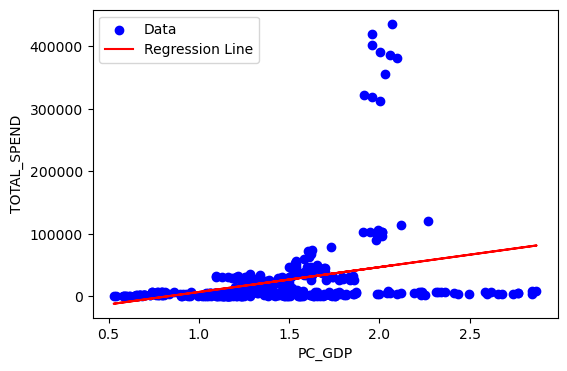

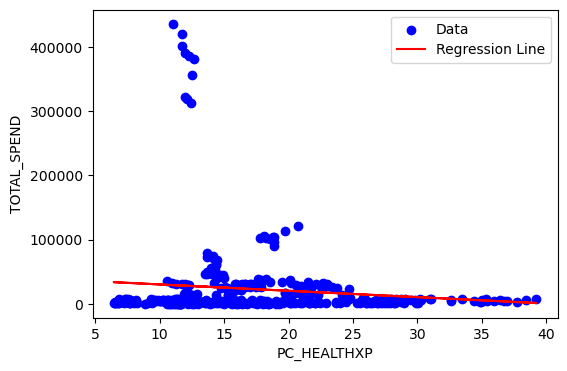

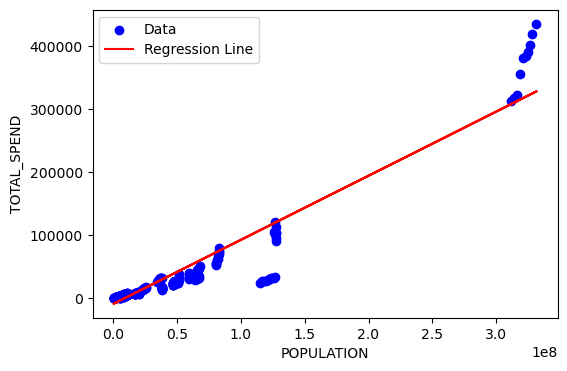

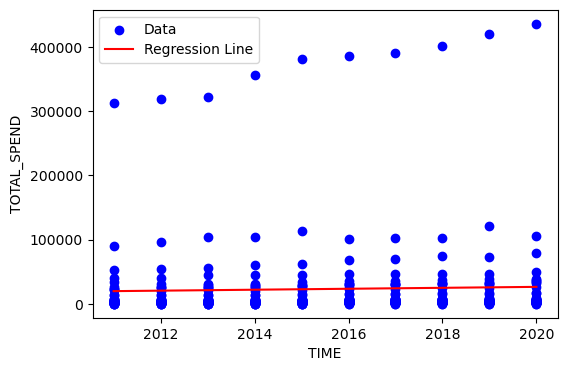

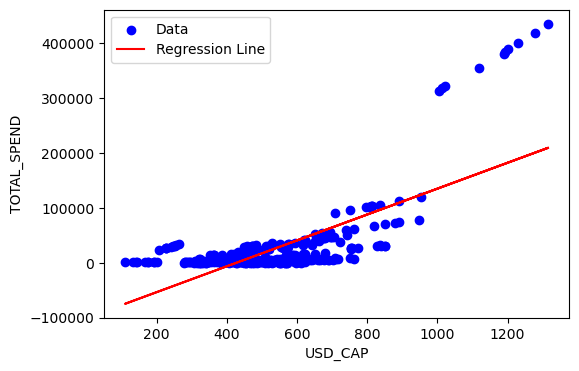

In [6]:
# Exclude the outcome
feature_names = df.select_dtypes(include=[float, int]).columns.difference(['TOTAL_SPEND'])

# Loop through each numeric feature in df
for feature in feature_names:
    X_feature = df[[feature]].values
    y = df['TOTAL_SPEND'].values
    
    # Create a scatter plot for the feature against the target: TOTAL_SPEND
    plt.figure(figsize=(6, 4))
    
    #Reshape X_feature for sklearn
    plt.scatter(X_feature.flatten(), y, label='Data', color='blue')
    
    #fit a linear regression model
    lm = LinearRegression()
    lm.fit(X_feature, y)
    y_pred = lm.predict(X_feature)
    
    #Plot the regression line
    plt.plot(X_feature.flatten(), y_pred, color='red', label='Regression Line')
    
    #Add labels and title
    plt.xlabel(feature)
    plt.ylabel('TOTAL_SPEND')
    
    #Add a legend()
    plt.legend()
    
    #Show the plot
    plt.show()


In [22]:
#set a seed for reproducibility
np.random.seed(42)

#split the data into training and testing set.
X = df.select_dtypes(include=['number']).drop(columns=['TOTAL_SPEND'])
y = df['TOTAL_SPEND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [24]:
# Regression model
lm = LinearRegression()
lm.fit(X_train, y_traiin)

numeric_predictors = X_train.columns

# Create a DataFrame containing the slope and intercept
coefficents_df = pd.DataFrame({
    "predictor": numeric_predictors.tolist(),
    "slope":lm.coef_,
    "intercept": [lm.intercept_] * len(lm.coef_)
})

#Display the results
print(coefficents_df)

     predictor        slope      intercept
0         TIME  -468.852646  907745.297043
1  PC_HEALTHXP  -118.893208  907745.297043
2       PC_GDP -6511.102936  907745.297043
3      USD_CAP    83.943990  907745.297043
4   POPULATION     0.000865  907745.297043


In [26]:
def rmspe(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    nonzero_idx = y_true != 0

    relative_errors = (y_true[nonzero_idx] - y_pred[nonzero_idx]) / y_true[nonzero_idx]

    percentage_errors = np.square(relative_errors)
    mean_percentage_error = np.mean(percentage_errors)

    rmspe_value = np.sqrt(mean_percentage_error) * 100
    return rmspe_value

y_pred = lm.predict(X_test)
test_rmspe = rmspe(y_test, y_pred)

print(f"Final Model Test Error (RMSPE): {test_rmspe: 2f}%")

Final Model Test Error (RMSPE):  1166.317635%


In [27]:
from sklearn.metrics import r2_score

In [28]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print("R² (test):", lm.score(X_test, y_test))

print("R² (test) with r2_score:", r2_score(y_test, y_pred))

R² (test): 0.921692462395542
R² (test) with r2_score: 0.921692462395542
